### hp(마력수)가 mpg(연비)에 영향을 미치는가? mtcarsDataset을 이용하여 확인해보시오.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [12]:
data = pd.read_csv(('C:/develop/jupyter notebook/mtcarsDataset.csv'))

In [13]:
data.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### 미리 선형 모델을 만들기 전에 scatter plot을 만들어보고 육안으로 대충 확인해본다.

Text(0.5, 1.0, 'HP vs MPG')

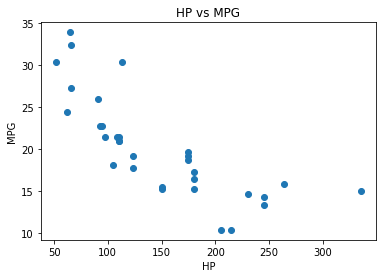

In [16]:
#plotting data
%matplotlib inline
plt.scatter(data['hp'], data['mpg']) # hp : 마력수, mpg : 연비
plt.xlabel('HP')
plt.ylabel('MPG')
plt.title('HP vs MPG')

### 나중에 주의해야 할 사항<br>
웬만한 것은 matrix 쓸 필요 없고 있는 것 그대로 쓰기 위해서 np.array를 쓰자

In [18]:
lm = LinearRegression()

In [19]:
x1 = ['hp']

In [20]:
result1 = lm.fit(data[x1],data['mpg'])

In [25]:
print('Coefficients:', lm.coef_)
print('Intercept:',lm.intercept_)

Coefficients: [-0.06822828]
Intercept: 30.098860539622496


In [26]:
x2 = ['hp', 'wt', 'carb']

In [27]:
result2 = lm.fit(data[x2], data['mpg'])

In [28]:
print('Coefficients:', lm.coef_)
print('Intercept:',lm.intercept_)

Coefficients: [-0.0299634  -3.89579762 -0.09288048]
Intercept: 37.280862006864936


### multiple regression을 구현하자.

In [52]:
import statsmodels.api as sm

In [53]:
X = data.drop('mpg', axis=1)

In [56]:
mr = sm.OLS(data["mpg"], data[x1])
mr2 = mr.fit()
mr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.608
Model:                            OLS   Adj. R-squared (uncentered):              0.595
Method:                 Least Squares   F-statistic:                              47.98
Date:                Tue, 05 Nov 2019   Prob (F-statistic):                    9.06e-08
Time:                        11:20:59   Log-Likelihood:                         -127.79
No. Observations:                  32   AIC:                                      257.6
Df Residuals:                      31   BIC:                                      259.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
hp             0.1011      0.015      6.927      0.000       0.071       0.131
==============================================================================
Omnibus:                        1.308   Durbin-Watson:                   1.101
Prob(Omnibus):                  0.520   Jarque-Bera (JB):                0.936
Skew:                          -0.010   Prob(JB):                        0.626
Kurtosis:                       2.162   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""